In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./df_dum.csv')

In [8]:
df.head()

,DETERIORATION_RATE,STATE_CODE_001,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,SURFACE_TYPE_108A_concrete,SURFACE_TYPE_108A_none
0,0.150000,1,2,0,0,1,17.7,18.9,9.8,61.0,2,253.4,5.0,0,-87.390000,34.469000,1,1,0,0
1,0.100000,1,3,0,0,3,10.4,34.7,15.2,25.0,2,7.6,4.0,0,-86.508000,34.103000,0,1,1,0
2,0.200000,1,1,0,0,5,6.0,30.3,4.8,99.0,0,0.0,2.0,2,-85.335334,32.450336,1,0,1,0
3,0.080000,1,1,0,0,1,6.1,7.0,4.9,99.0,0,0.0,2.0,2,-85.310334,33.020668,1,0,0,0
4,0.111111,1,2,0,0,1,18.3,110.6,7.9,93.0,1,110.0,4.0,2,-87.190000,34.403000,1,0,0,0


In [37]:
df['DETERIORATION_RATE'].describe()

count    9.152000e+04
mean     1.062283e-01
std      8.810920e-02
min      8.881784e-17
25%      5.000000e-02
50%      8.750000e-02
75%      1.333333e-01
max      1.375000e+00
Name: DETERIORATION_RATE, dtype: float64

In [7]:
# Shuffle our dataframe first since bridges are ordered by state code in the df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
df.head()

,DETERIORATION_RATE,STATE_CODE_001,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,WATERWAY_EVAL_071,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,SURFACE_TYPE_108A_concrete,SURFACE_TYPE_108A_none
0,0.088889,48,2,0,0,2,30.8,122.5,12.2,36.0,1,754.80,1.0,1,-99.034002,29.210335,0,0,0,0
1,0.150000,9,8,2,32,3,67.1,156.1,42.5,25.0,2,12051.00,1.0,2,-72.533834,41.192169,1,1,0,0
2,0.130000,36,2,0,23,3,14.0,41.5,10.7,58.0,2,24.96,1.0,0,-76.025668,43.466334,1,0,0,0
3,0.044444,29,2,0,15,3,21.3,53.0,7.5,10.0,1,96.36,1.0,1,-94.236668,39.269000,1,0,1,0
4,0.050000,50,1,0,22,2,29.3,50.3,9.4,26.0,2,650.00,1.0,0,-73.073002,44.310836,1,1,0,0


In [11]:
list(df.columns)

['DETERIORATION_RATE',
 'STATE_CODE_001',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'WATERWAY_EVAL_071',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'SURFACE_TYPE_108A_concrete',
 'SURFACE_TYPE_108A_none']

In [9]:
# Data Preparation
X = df[['STATE_CODE_001',
     'TRAFFIC_LANES_ON_028A',
     'MEDIAN_CODE_033',
     'DEGREES_SKEW_034',
     'MAIN_UNIT_SPANS_045',
     'MAX_SPAN_LEN_MT_048',
     'STRUCTURE_LEN_MT_049',
     'DECK_WIDTH_MT_052',
     'AGE',
     'DESIGN_LOAD_031',
     'TRUCK_ADT',
     'MAINTENANCE_021',
     'WATERWAY_EVAL_071',
     'LONGITUDE',
     'LATITUDE',
     'STRUCTURE_KIND_043A_steel',
     'FUNCTIONAL_CLASS_026_urban',
     'SURFACE_TYPE_108A_concrete',
     'SURFACE_TYPE_108A_none']] 

y = df['DETERIORATION_RATE'] 

In [10]:
# Split into train and test
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [12]:
X_train.shape

(73216, 19)

In [13]:
# Mean model - predicts the average of the labels in the training data

pred1 = y_train.mean()
pred1

0.10632687841675992

In [14]:
dfr=pd.DataFrame()
dfr['y_real'] = y_train
dfr['y_pred1'] = pred1

In [15]:
dfr.head()

,y_real,y_pred1
62234,0.030000,0.106327
20928,0.080000,0.106327
61891,0.020000,0.106327
10524,0.066667,0.106327
32984,0.050000,0.106327


In [17]:
# Mean Absolute Error for mean model

dfr['resid1'] = np.abs(dfr['y_real']-dfr['y_pred1'])
dfr['resid1'].mean()

0.06180044923967025

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,dfr['y_pred1'])

0.06180044923964423

In [43]:
# Mean Squared Error for mean model
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,dfr['y_pred1']))

0.08817272509342798

### Linear regression

In [23]:
# Linear regression is the benchmark in a regression problem

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [24]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred = reg.predict(X_test)

In [26]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.06057770686702713

In [42]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.08637179106777863

The fit of the linear regression model is better than the fit of the mean model.

In [32]:
# Plot of the residuals
y_resid = y_test-y_pred

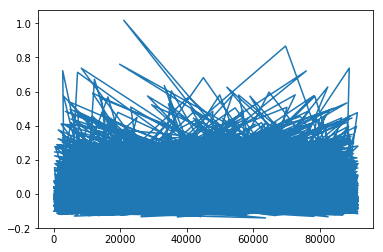

In [36]:
plt.plot(y_resid)

In [28]:
y_train_pred = reg.predict(X_train)
mean_squared_error(y_train, y_train_pred)

0.007497200300889508

In [29]:
# R2 score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.03339397501870911

R2 score is very low, which means that the features we are using as indepedent variables do not explain properly the deterioration rate of the bridges.

In [31]:
r2_score(y_train,y_train_pred)

0.03565909900917663

### Ridge regularization

In [ ]:
from sklearn.linear_model import Ridge

### K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsRegressor

regknn = KNeighborsRegressor(n_neighbors=2)

regknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [39]:
mean_absolute_error(y_test,regknn.predict(X_test))

0.06789496166449292

In [46]:
np.sqrt(mean_squared_error(y_test,regknn.predict(X_test)))

0.1001472273221743

In [41]:
r2_score(y_test,regknn.predict(X_test))

-0.29952161213576867

In [44]:
# Para ver que valor de k es el mejor tendré que ir probando
maes = []
for i in range(2,50):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

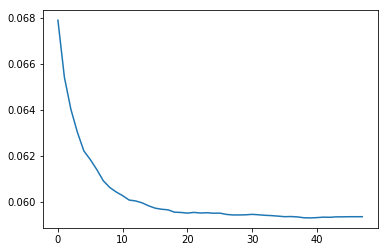

In [45]:
plt.plot(maes)

In [47]:
regknn10 = KNeighborsRegressor(n_neighbors=10)

regknn10.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [49]:
mean_absolute_error(y_test,regknn10.predict(X_test))

0.060625539391164406

In [48]:
np.sqrt(mean_squared_error(y_test,regknn10.predict(X_test)))

0.08725979687377418

In [50]:
regknn50 = KNeighborsRegressor(n_neighbors=50)

regknn50.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=50, p=2,
          weights='uniform')

In [52]:
np.sqrt(mean_squared_error(y_test,regknn50.predict(X_test)))

0.08534039564293587

In [64]:
# GridSearchCV with RMSE score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors':np.arange(5,50)}, scoring = 'neg_mean_squared_error')
reg_test.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [65]:
reg_test.best_params_

{'n_neighbors': 38}

In [66]:
reg_test.best_score_

-0.007340704353458795

In [67]:
reg_test.scoring

'neg_mean_squared_error'

In [68]:
# GridSearchCV with R2 score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors':np.arange(5,50)}, 
                        scoring='r2')
reg_test.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [69]:
reg_test.best_params_

{'n_neighbors': 38}

In [70]:
reg_test.best_score_

0.054399427410260846

In [58]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])